In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Data_Set.csv')

In [ ]:
df.shape

(45211, 18)

In [ ]:
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.sample(10)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45070,46071,49.0,technician,married,secondary,no,2400.0,no,no,cellular,21,oct,262,3,-1,0,unknown,no
38884,39885,28.0,management,single,tertiary,no,788.0,yes,yes,cellular,18,may,169,1,-1,0,unknown,no
44350,45351,64.0,retired,married,primary,no,12067.0,no,no,telephone,30,jul,367,2,92,2,success,yes
23640,24641,31.0,management,single,tertiary,no,0.0,no,no,cellular,28,aug,38,16,-1,0,unknown,no
5461,6462,45.0,blue-collar,married,primary,no,0.0,no,no,unknown,23,may,574,5,-1,0,unknown,no
9913,10914,36.0,management,married,tertiary,no,2823.0,no,no,unknown,9,jun,411,2,-1,0,unknown,no
20574,21575,35.0,technician,married,tertiary,no,432.0,no,no,cellular,12,aug,104,8,-1,0,unknown,no
612,1613,55.0,services,married,primary,no,255.0,yes,no,unknown,6,may,285,1,-1,0,unknown,no
18523,19524,46.0,blue-collar,married,primary,no,333.0,yes,no,cellular,31,jul,284,4,-1,0,unknown,no
27278,28279,33.0,management,married,tertiary,no,1817.0,no,no,cellular,21,nov,55,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [ ]:
df.isnull().sum()

,0
Id,0
age,9
job,0
marital,0
education,0
default,0
balance,3
housing,0
loan,0
contact,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['y'].value_counts()

,count
y,
no,39922
yes,5289


In [ ]:
df['age'].unique()

array([999.,  44.,  33.,  47.,  35.,  28.,  nan,  58.,  43.,  41.,  29.,
        53.,  57.,  51.,  45.,  60.,  56.,  32.,  25.,  40.,  39.,  52.,
        46.,  36.,  49.,  59.,  37.,  50.,  54.,  55.,  48.,  31.,  42.,
        30.,  27.,  34.,  38.,  23.,  26.,  61.,  22.,  24.,  21.,  20.,
        66.,  62.,  83.,  75.,  67.,  70.,  65.,  68.,  64.,  69.,  72.,
        71.,  19.,  76.,  85.,  63.,  90.,  82.,  73.,  74.,  78.,  80.,
        94.,  79.,  77.,  86.,  95.,  81.,  18.,  89.,  84.,  87.,  92.,
        93.,  88.,  -1.])

In [ ]:
# df['y']=np.where(df['y']=='yes',1,0)
y_new=[]
for i in df['y']:
  if i=="yes":
    y_new.append(1)
  else:
    y_new.append(0)
df['y']=y_new
df['y'].value_counts()

,count
y,
0,39922
1,5289


In [ ]:
df.corr(numeric_only=True)

,Id,age,balance,day,duration,campaign,pdays,previous,y
Id,1.000000,0.010182,0.073605,-0.061465,0.013031,-0.102884,0.437729,0.271098,0.296287
age,0.010182,1.000000,0.090419,-0.010820,-0.004389,0.003452,-0.022584,0.000289,0.021828
balance,0.073605,0.090419,1.000000,0.004471,0.021554,-0.014592,0.003425,0.016668,0.052830
day,-0.061465,-0.010820,0.004471,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,0.013031,-0.004389,0.021554,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,-0.102884,0.003452,-0.014592,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,0.437729,-0.022584,0.003425,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.271098,0.000289,0.016668,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.296287,0.021828,0.052830,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [ ]:
df.sample(5)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
19919,20920,30.0,management,single,tertiary,no,0.0,no,no,cellular,8,aug,88,5,-1,0,unknown,0
40911,41912,57.0,management,married,secondary,no,7633.0,no,no,cellular,12,aug,301,1,-1,0,unknown,0
7180,8181,23.0,services,single,secondary,no,0.0,yes,no,unknown,29,may,544,4,-1,0,unknown,0
31190,32191,41.0,management,married,secondary,no,280.0,yes,no,cellular,27,feb,87,2,-1,0,unknown,1
41931,42932,33.0,admin.,married,tertiary,no,79.0,yes,no,cellular,22,oct,249,2,335,2,failure,1


<Axes: xlabel='y'>

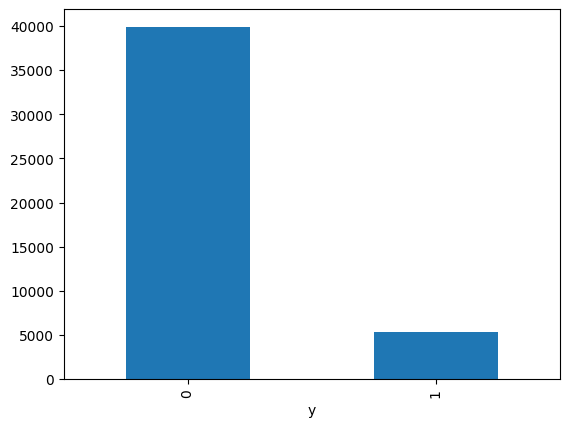

In [ ]:
df['y'].value_counts().plot(kind='bar') #to visualize the categorical data we can use pie char or bar graph

In [ ]:
#to analyze the numerical data in the given data set we can plot histogram.

In [ ]:
import matplotlib.pyplot as plt

(array([3.0000e+00, 1.2000e+01, 4.0730e+03, 1.7784e+04, 1.2143e+04,
        8.6330e+03, 1.9560e+03, 4.4200e+02, 1.4300e+02, 1.2000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

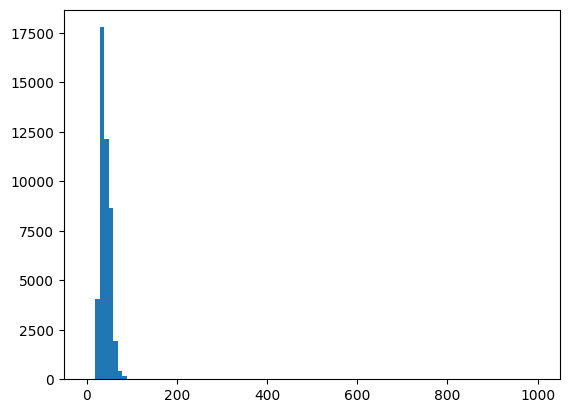

In [ ]:
plt.hist(df['age'],bins=100)

<ipython-input-190-2650e257c339>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],bins=100)


<Axes: xlabel='age', ylabel='Density'>

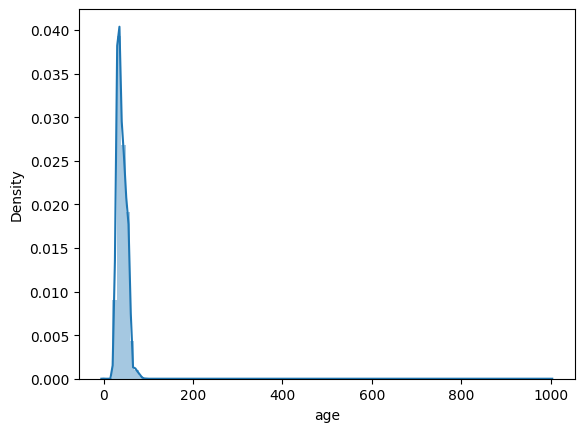

In [ ]:
sns.distplot(df['age'],bins=100)

In [ ]:
# sns.boxplot(df['age'])

<Axes: >

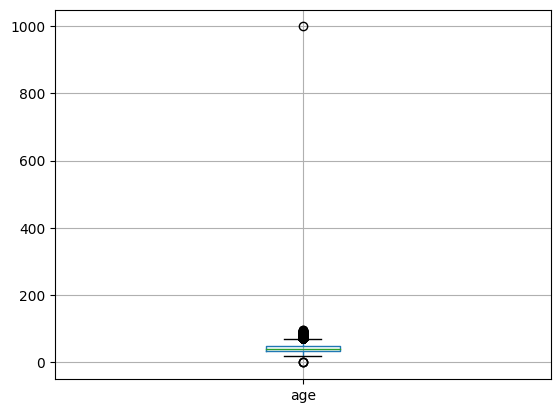

In [ ]:
df.boxplot(column='age')

In [ ]:
# df['age']=np.where(df['age']>100,df['age'].median(),df['age'])

age_list = df['age'].tolist()
median_age = sorted(age_list)[len(age_list) // 2]
new_age_list = []
for age in age_list:
  if age > 100:
    new_age_list.append(median_age)
  else:
    new_age_list.append(age)
df['age'] = new_age_list


In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to keep only non-outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

<Axes: >

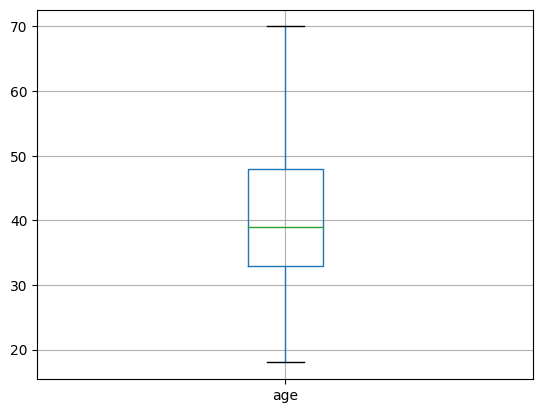

In [ ]:
df.boxplot(column='age')

<Axes: >

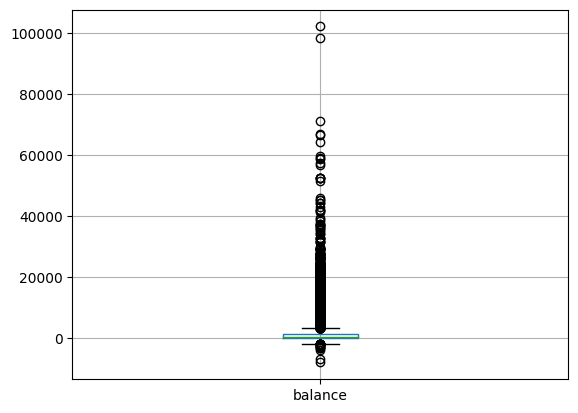

In [ ]:
df.boxplot(column='balance')

In [ ]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to keep only non-outliers
df = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

<Axes: ylabel='balance'>

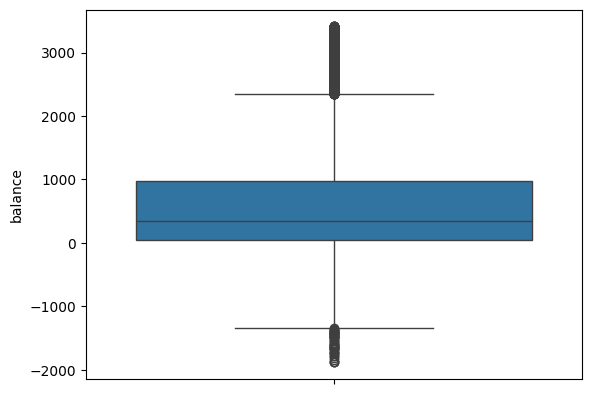

In [ ]:
sns.boxplot(df['balance'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40015 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         40015 non-null  int64  
 1   age        40015 non-null  float64
 2   job        40015 non-null  object 
 3   marital    40015 non-null  object 
 4   education  40015 non-null  object 
 5   default    40015 non-null  object 
 6   balance    40015 non-null  float64
 7   housing    40015 non-null  object 
 8   loan       40015 non-null  object 
 9   contact    40015 non-null  object 
 10  day        40015 non-null  int64  
 11  month      40015 non-null  object 
 12  duration   40015 non-null  int64  
 13  campaign   40015 non-null  int64  
 14  pdays      40015 non-null  int64  
 15  previous   40015 non-null  int64  
 16  poutcome   40015 non-null  object 
 17  y          40015 non-null  int64  
dtypes: float64(2), int64(7), object(9)
memory usage: 5.8+ MB


In [ ]:
#df['job'].value_counts()

job_counts = {}
for job in df['job']:
  if job in job_counts:
    job_counts[job] += 1
  else:
    job_counts[job] = 1

for job, count in job_counts.items():
  print(f"{job}: {count}")


management: 8112
technician: 6829
entrepreneur: 1331
blue-collar: 8931
unknown: 241
admin.: 4712
services: 3838
retired: 1571
self-employed: 1384
unemployed: 1148
housemaid: 1081
student: 837


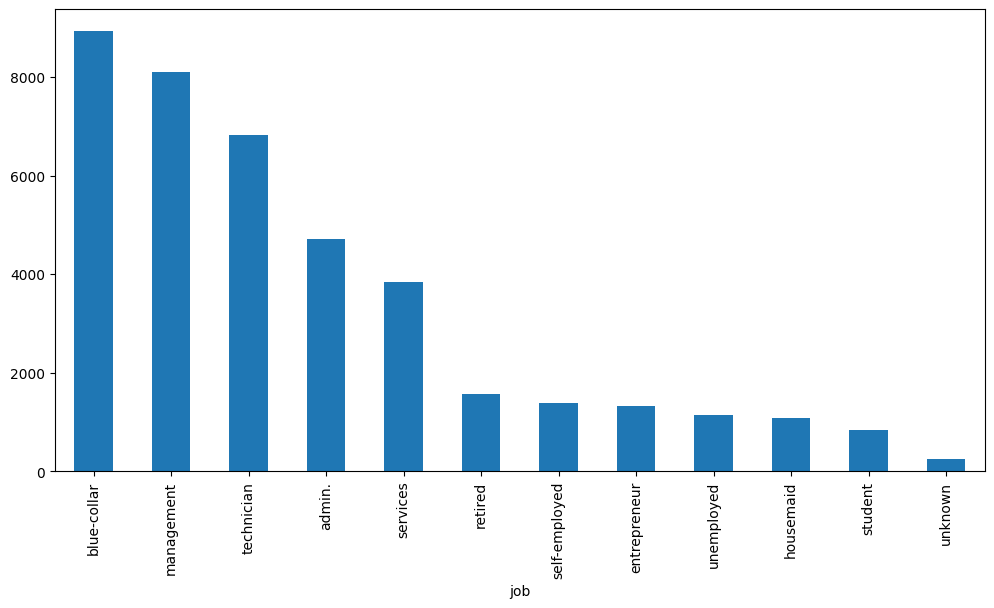

In [ ]:
df['job'].value_counts().plot(kind='bar', figsize=(12,6));

In [ ]:
# We can see that most of the clients beloned to
# blue-collar job are most  and students are least in general as they don't make term deposits in general.

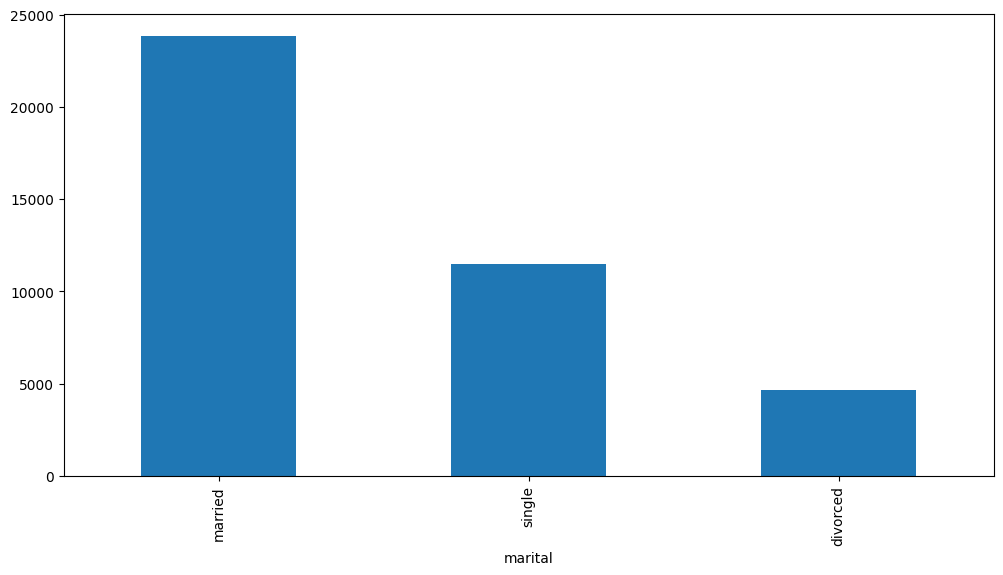

In [ ]:
# prompt: maratial status

df['marital'].value_counts()
df['marital'].value_counts().plot(kind='bar', figsize=(12,6));


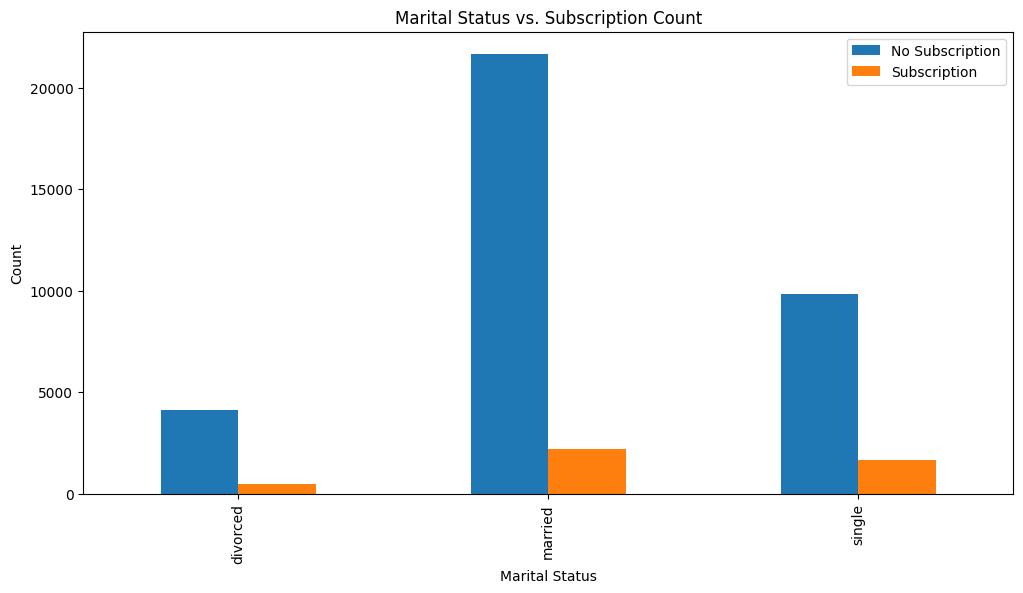

In [ ]:
marital_y_counts = df.groupby(['marital', 'y'])['y'].count().unstack()
marital_y_counts.plot(kind='bar', figsize=(12,6))
plt.title('Marital Status vs. Subscription Count')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(['No Subscription', 'Subscription'])
plt.show()


In [ ]:
#bivariate analysis
# Numeric-Numeric data corelation
    # scaterplot
    # palirplot
    # line plot
# Numeric-Categorical
    # barplot
    # boxplot
    # distplot
#Categorical-Categorical
    # heatmap
    # clustermap

y                 0     1
job                      
admin.         4167   545
blue-collar    8298   633
entrepreneur   1227   104
housemaid       993    88
management     7055  1057
retired        1305   266
self-employed  1228   156
services       3501   337
student         602   235
technician     6119   710
unemployed      963   185
unknown         214    27


<Axes: xlabel='age', ylabel='y'>

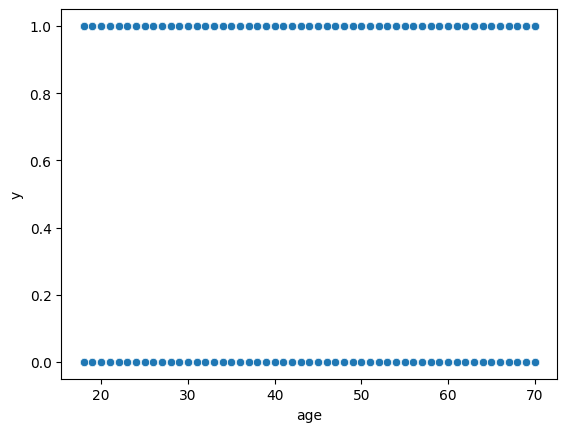

In [ ]:
print(pd.crosstab(df['job'],df['y']))
sns.scatterplot(x=df['age'],y=df['y'])
#no relation is found



<Axes: xlabel='job', ylabel='y'>

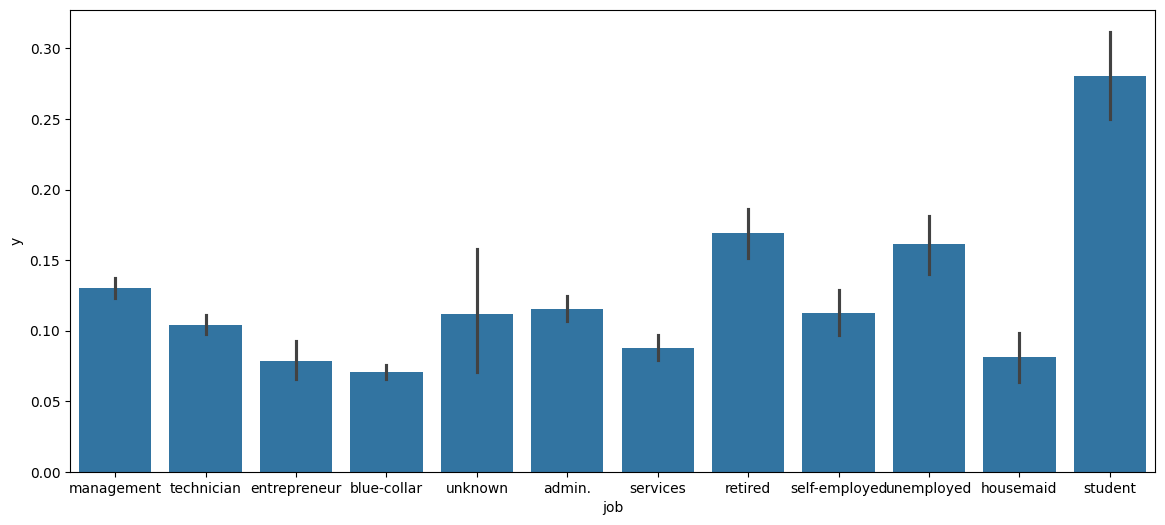

In [ ]:
pd.crosstab(df['job'],df['y'])
plt.figure(figsize=(14, 6))  # Set figsize here
ax = plt.gca()
sns.barplot(x=df['job'],y=df['y'],ax=ax)
#From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit,
# which is surprising as students generally do not subscribe to a term deposit.
# The possible reason is that the number of students in the dataset
# is less and comparatively to other job types, more students have subscribed to a term deposit.

<Axes: xlabel='marital', ylabel='y'>

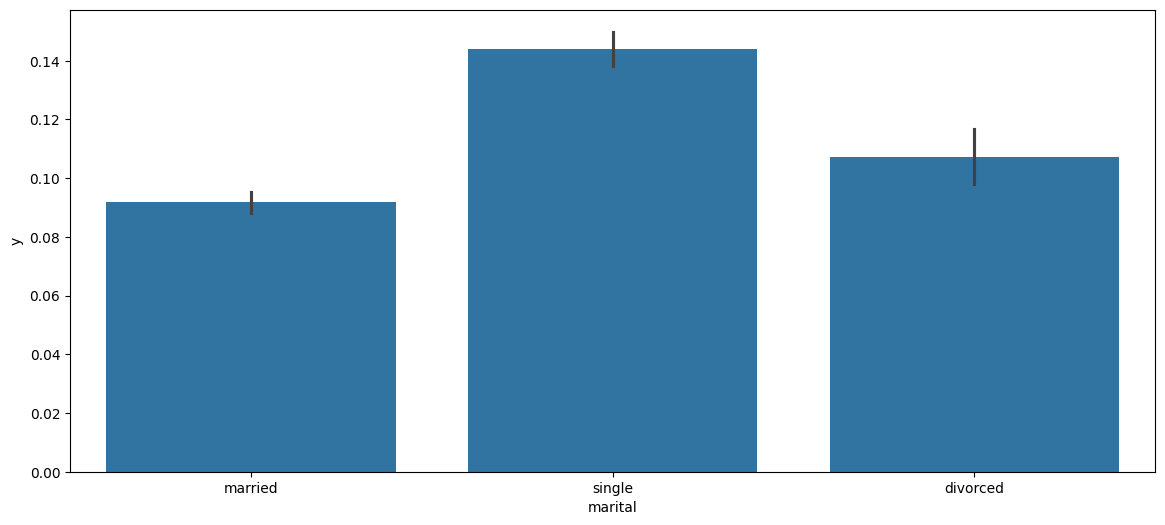

In [ ]:
pd.crosstab(df['marital'],df['y'])
plt.figure(figsize=(14, 6))  # Set figsize here
ax = plt.gca()
sns.barplot(x=df['marital'],y=df['y'],ax=ax)
#here it is not clear who is taking the term deposite as all of them are closer to each other.

<Axes: xlabel='balance', ylabel='y'>

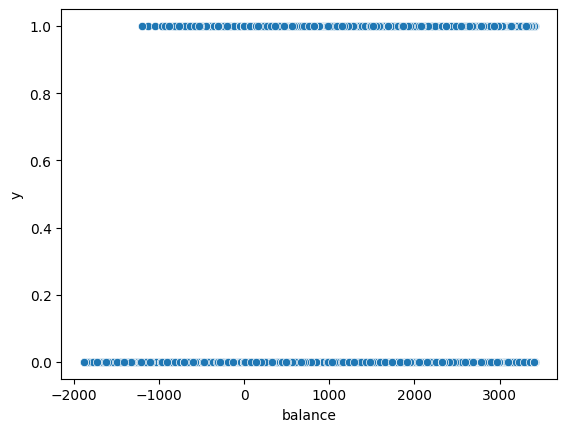

In [ ]:
sns.scatterplot(x=df['balance'],y=df['y'])
#Here we can see that only those poeople who have >-1000 balance are subscribing for term deposite.

                Id       age   balance       day  duration  campaign  \
Id        1.000000 -0.048047  0.104003 -0.060342  0.005623 -0.098083   
age      -0.048047  1.000000  0.081248 -0.004766 -0.019329  0.014213   
balance   0.104003  0.081248  1.000000  0.000384  0.038324 -0.034949   
day      -0.060342 -0.004766  0.000384  1.000000 -0.031566  0.166994   
duration  0.005623 -0.019329  0.038324 -0.031566  1.000000 -0.083455   
campaign -0.098083  0.014213 -0.034949  0.166994 -0.083455  1.000000   
pdays     0.442559 -0.031308  0.026679 -0.096922 -0.005102 -0.089136   
previous  0.265128 -0.007466  0.032237 -0.053217 -0.001934 -0.031978   
y         0.281056 -0.019213  0.085681 -0.032818  0.400465 -0.070586   

             pdays  previous         y  
Id        0.442559  0.265128  0.281056  
age      -0.031308 -0.007466 -0.019213  
balance   0.026679  0.032237  0.085681  
day      -0.096922 -0.053217 -0.032818  
duration -0.005102 -0.001934  0.400465  
campaign -0.089136 -0.031978 -0.0

<Axes: >

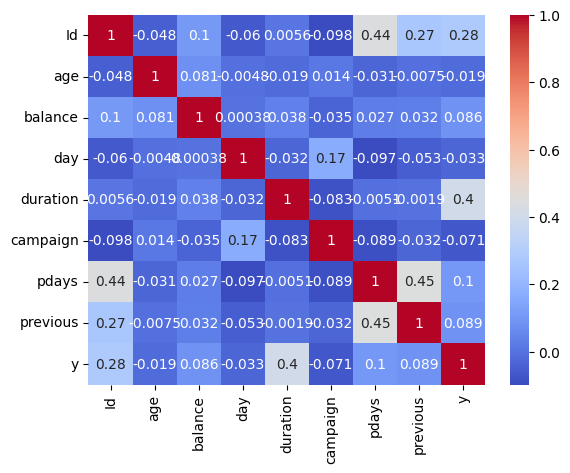

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_correlation(df):

  numeric_cols = df.select_dtypes(include=np.number).columns
  correlation_matrix = pd.DataFrame(index=numeric_cols, columns=numeric_cols)

  for col1 in numeric_cols:
    for col2 in numeric_cols:
      if col1 == col2:
        correlation_matrix.loc[col1, col2] = 1.0
      else:
        # Use .values to get the underlying NumPy array, ensuring numeric indexing
        correlation_matrix.loc[col1, col2] = calculate_pearson_correlation(df[col1].values, df[col2].values)

  # Convert all values in the correlation matrix to numeric
  correlation_matrix = correlation_matrix.astype(float)
  return correlation_matrix

def calculate_pearson_correlation(series1, series2):
  """
  Calculates the Pearson correlation coefficient between two series.

  Args:
    series1: A pandas Series or NumPy array.
    series2: A pandas Series or NumPy array.

  Returns:
    The Pearson correlation coefficient.
  """
  n = len(series1)
  if n != len(series2):
    raise ValueError("Series must have the same length")

  mean1 = sum(series1) / n
  mean2 = sum(series2) / n

  # Use numeric indexing to avoid KeyError
  numerator = sum([(series1[i] - mean1) * (series2[i] - mean2) for i in range(n)])
  denominator = ((sum([(series1[i] - mean1) ** 2 for i in range(n)])) ** 0.5) * \
                ((sum([(series2[i] - mean2) ** 2 for i in range(n)])) ** 0.5)

  if denominator == 0:
    return 0  # Handle the case of zero variance
  else:
    return numerator / denominator

correlation_matrix_manual = calculate_correlation(df)
print(correlation_matrix_manual)
sns.heatmap(correlation_matrix_manual,annot=True,cmap='coolwarm') # Now this line should work

In [ ]:
# We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more,
# there are higher chances that the client is showing interest in the term deposit and
# hence there are higher chances that the client will subscribe to term deposit.

In [ ]:
# Model Building


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
target=df['y']
train=df.drop('y',axis=1)
X_train,X_test,y_train,y_test=train_test_split(train,target,test_size=0.2,random_state=42)

In [ ]:
def one_hot_encode(df, column_name):
  unique_values = df[column_name].unique()
  for value in unique_values:
    df[column_name + "_" + str(value)] = (df[column_name] == value).astype(int)
  df.drop(column_name, axis=1,inplace=True)


In [ ]:
for i in ['job','marital','month','poutcome','education','contact']:
  one_hot_encode(X_train,i)
  one_hot_encode(X_test,i)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32012 entries, 32669 to 17193
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   32012 non-null  int64  
 1   age                  32012 non-null  float64
 2   default              32012 non-null  object 
 3   balance              32012 non-null  float64
 4   housing              32012 non-null  object 
 5   loan                 32012 non-null  object 
 6   day                  32012 non-null  int64  
 7   duration             32012 non-null  int64  
 8   campaign             32012 non-null  int64  
 9   pdays                32012 non-null  int64  
 10  previous             32012 non-null  int64  
 11  job_blue-collar      32012 non-null  int64  
 12  job_services         32012 non-null  int64  
 13  job_management       32012 non-null  int64  
 14  job_entrepreneur     32012 non-null  int64  
 15  job_retired          32012 non-null  

<Axes: xlabel='default', ylabel='y'>

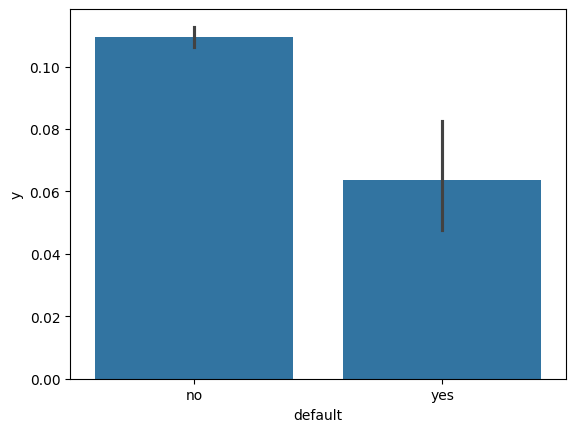

In [ ]:
sns.barplot(x=df['default'],y=df['y'])

In [ ]:
new=[]
for i in X_train['default']:
  if i=='yes':
    new.append(0)
  else:
    new.append(1)
X_train['default']=new

In [ ]:
new=[]
for i in X_test['default']:
  if i=='yes':
    new.append(0)
  else:
    new.append(1)
X_test['default']=new

In [ ]:
new=[]
for i in X_train['housing']:
  if i=='yes':
    new.append(1)
  else:
    new.append(0)
X_train['housing']=new

In [ ]:
new=[]
for i in X_test['housing']:
  if i=='yes':
    new.append(1)
  else:
    new.append(0)

X_test['housing']=new

In [ ]:
new=[]
for i in X_train['loan']:
  if i=='yes':
    new.append(0)
  else:
    new.append(1)
X_train['loan']=new

In [ ]:
new=[]
for i in X_test['loan']:
  if i=='yes':
    new.append(0)
  else:
    new.append(1)
X_test['loan']=new

In [ ]:
X_train.head()

,Id,age,default,balance,housing,loan,day,duration,campaign,pdays,...,poutcome_failure,poutcome_other,poutcome_success,education_primary,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_cellular,contact_unknown
32669,33670,54.0,1,736.0,1,0,17,158,1,-1,...,0,0,0,1,0,0,0,1,0,0
15992,16993,37.0,1,145.0,1,1,22,74,13,-1,...,0,0,0,0,1,0,0,1,0,0
42202,43203,33.0,1,1388.0,1,1,10,280,1,89,...,1,0,0,0,0,1,0,0,1,0
11847,12848,39.0,0,-251.0,0,1,20,421,6,-1,...,0,0,0,0,0,1,0,0,0,1
39998,40999,34.0,1,1047.0,0,1,3,342,1,90,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32012 entries, 32669 to 17193
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   32012 non-null  int64  
 1   age                  32012 non-null  float64
 2   default              32012 non-null  int64  
 3   balance              32012 non-null  float64
 4   housing              32012 non-null  int64  
 5   loan                 32012 non-null  int64  
 6   day                  32012 non-null  int64  
 7   duration             32012 non-null  int64  
 8   campaign             32012 non-null  int64  
 9   pdays                32012 non-null  int64  
 10  previous             32012 non-null  int64  
 11  job_blue-collar      32012 non-null  int64  
 12  job_services         32012 non-null  int64  
 13  job_management       32012 non-null  int64  
 14  job_entrepreneur     32012 non-null  int64  
 15  job_retired          32012 non-null  

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias
def compute_cost(y, W, X, b):
    m = len(y)
    linear_model = np.dot(X, W) + b
    cost = (1 / m) * np.sum(np.log(1 + np.exp(-y * linear_model)))
    return cost

def compute_gradients(X, y, W, b):
    m = X.shape[0]
    linear_model = np.dot(X, W) + b
    z = -y * linear_model
    sigmoid_z = sigmoid(z)
    dw = -np.dot(X.T, y * sigmoid_z)
    db = -np.mean(y * sigmoid_z)
    return dw, db


def optimize(X, y, weights, bias, learning_rate, num_iterations):
    costs = []
    for i in range(num_iterations):
        cost = compute_cost(y, weights, X, bias)
        costs.append(cost)
        dw, db = compute_gradients(X, y, weights, bias)
        weights -= learning_rate * dw
        bias -= learning_rate * db
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return weights, bias, costs

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    predictions = np.where(y_pred >= 0.5, 0, 1)
    return predictions


In [ ]:
weights, bias = initialize_weights(X_train.shape[1])

# Step 2: Train the model using gradient descent
learning_rate = 0.01
num_iterations = 10
weights, bias, costs = optimize(X_train, y_train, weights, bias, learning_rate, num_iterations)

# Step 3: Predict on new data
predictions = predict(X_test, weights, bias)


Iteration 0: Cost = 0.6931


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)

0.8914157191053355

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_test = X_test[X_train.columns]

# Now fit and predict using the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = None
        self.var = None
        self.prior = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self.prior = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.prior[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self.classes):
            prior = np.log(self.prior[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator



nb_classifier = NaiveBayes()


nb_classifier.fit(X_train.values, y_train.values)

y_pred_manual = nb_classifier.predict(X_test.values)

accuracy_manual = accuracy_score(y_test, y_pred_manual)
print(f"Accuracy of Naive Bayes implementation: {accuracy_manual}")

Accuracy of Naive Bayes implementation: 0.8583031363238786


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_dt)

0.8920404848181932